In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.data.txt to iris.data.txt


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt

with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

## **splitting the data**

In [ ]:
import random
import csv
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        random.seed(0)         #With the seed (every time), the same set of numbers will appear every time.
        random.shuffle(dataset) #if u want to shuffle data
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
        indx= int(len(dataset)*split)
        trainingSet= dataset[:indx]
        testSet=dataset[indx:]

        return trainingSet , testSet

trainingSet=[]
testSet = []

l =loadDataset('iris.data.txt', 0.66,trainingSet , testSet)

print (l)



([[5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [7.0, 3.2, 4.7, 1.4, 'Iris-versicolor'], [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'], [6.3, 2.7, 4.9, 1.8, 'Iris-virginica'], [5.7, 3.0, 4.2, 1.2, 'Iris-versicolor'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], [7.7, 3.0, 6.1, 2.3, 'Iris-virginica'], [6.0, 2.2, 5.0, 1.5, 'Iris-virginica'], [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'], [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], [6.7, 2.5, 5.8, 1.8, 'Iris-virginica'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [5.9, 3.0, 5.1, 1.8, 'Iris-virginica'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [6.7, 3.1, 5.6, 2.4, 'Iris-virginica'], [7.1, 3.0, 5.9, 2.1, 'Iris-virginica'], [5.2, 2.7, 3.9, 1.4, 'Iris-versicolor'], [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'], [6.7, 3.3, 5.7, 2.5, 'Iris-virginica'], [5.7, 2.5, 5.0, 2.0, 'Iris-virginica'], [5.8, 2.8, 5.1, 2.4, 'Iris-virginica'], [6.4, 2.7, 5.3, 1.9, 'Iris-virginica'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'], [5.4, 3.4, 1.7, 

## **Distance** function : Similarity


In [ ]:
import math
def euclideanDistance(instance1, instance2, length):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(difference_squared)


In [ ]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('Distance: ' , distance)

Distance:  3.4641016151377544


Neighbors :

In [ ]:
import operator

def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1
    print("length", length)
    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)
        print("dist",dist)
        distances.append((trainingSet[x], dist))
    print("distance without sort",distances)   
    distances.sort(key=operator.itemgetter(1))
    print("distance with sort",distances)   


    neighbors = []

    for x in range(k):

      neighbors.append(distances[x][0])

    return neighbors

In [ ]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

length 2
dist 4.242640687119285
dist 1.4142135623730951
distance without sort [([2, 2, 2, 'a'], 4.242640687119285), ([4, 4, 4, 'b'], 1.4142135623730951)]
distance with sort [([4, 4, 4, 'b'], 1.4142135623730951), ([2, 2, 2, 'a'], 4.242640687119285)]
[[4, 4, 4, 'b']]


## **Response**

In [ ]:
def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        classVotes.setdefault(response,0) 
        if response in classVotes.keys():
            classVotes[response] +=1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True) 
    return sortedVotes[0][0]


neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)
print(response)

a


# **Accuracy**

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct +=1
   
    return (correct/len(testSet)) * 100.0
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


## **Main**

In [ ]:
def main(dataset_filename, k, split, distanceFunc):
    
    trainingSet, testSet=loadDataset(dataset_filename, split)
    
    predictions = []
    for testInstance in testSet:
        neighbors = getNeighbors(trainingSet, testInstance[:-1], k)
        response = getResponse(neighbors)
        predictions.append(response)
        
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy = %.2f" % accuracy)
    return accuracy

In [ ]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, euclideanDistance)
    scores.append(accuracy)

Streaming output truncated to the last 5000 lines.
distance with sort [([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.0), ([5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], 0.1414213562373093), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730964), ([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.0, 3.5, 1.6, 0.6, 'Iris-setosa'], 0.22360679774997896), ([5.0, 3.3, 1.4, 0.2, 'Iris-setosa'], 0.22360679774997896), ([5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], 0.22360679774997916), ([5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.30000000000000027), ([5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], 0.31622776601683783), ([5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], 0.3316624790355407), ([5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], 0.3605551275463989), ([5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], 0.36055512754639907), ([5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], 0.41231056256176635), ([5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], 0.4358898943540679), ([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], 0.458257569

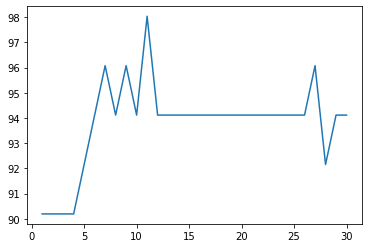

In [ ]:
plt.plot(range(1,31),scores)

# **Autres** distances

In [ ]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


In [ ]:
def manhattanDistance(instance1, instance2, length):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += abs(instance2[i]-instance1[i])

    return distance

def minkowskiDistance(instance1, instance2, length,degree=2):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), degree)
    return pow(difference_squared,1/degree)

Manhattan distance :

In [ ]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, manhattanDistance)
    scores.append(accuracy)

Streaming output truncated to the last 5000 lines.
distance with sort [([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.0), ([5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], 0.1414213562373093), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730964), ([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.0, 3.5, 1.6, 0.6, 'Iris-setosa'], 0.22360679774997896), ([5.0, 3.3, 1.4, 0.2, 'Iris-setosa'], 0.22360679774997896), ([5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], 0.22360679774997916), ([5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.30000000000000027), ([5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], 0.31622776601683783), ([5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], 0.3316624790355407), ([5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], 0.3605551275463989), ([5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], 0.36055512754639907), ([5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], 0.41231056256176635), ([5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], 0.4358898943540679), ([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], 0.458257569

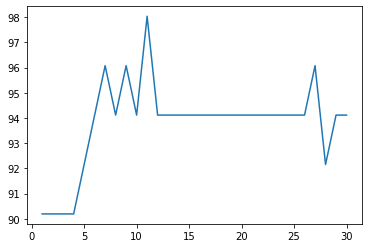

In [ ]:
plt.plot(range(1,31),scores)

In [ ]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


Minkowski distance :

In [ ]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, minkowskiDistance)
    scores.append(accuracy)

Streaming output truncated to the last 5000 lines.
distance with sort [([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.0), ([5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], 0.1414213562373093), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730964), ([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.14142135623730995), ([5.0, 3.5, 1.6, 0.6, 'Iris-setosa'], 0.22360679774997896), ([5.0, 3.3, 1.4, 0.2, 'Iris-setosa'], 0.22360679774997896), ([5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], 0.22360679774997916), ([5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.30000000000000027), ([5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], 0.31622776601683783), ([5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], 0.3316624790355407), ([5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], 0.3605551275463989), ([5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], 0.36055512754639907), ([5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], 0.41231056256176635), ([5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], 0.4358898943540679), ([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], 0.458257569

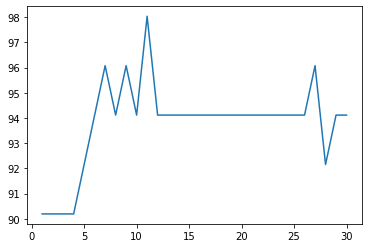

In [ ]:
plt.plot(range(1,31),scores)

In [ ]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


euclidean and minkowski ditances gived the best accuracys (98,03) with the same vlaue of k 11